In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

In [2]:
df_orders = pd.read_csv("orders.csv")
df_order_items = pd.read_csv("order-items.csv")

In [3]:
df_orders.head()

,seller_id,amazon_order_id,purchase_date,country,state,city,postal_code,order_total_sales_price
0,A3YS1AU2L1H89,701-5264690-2988203,2023-10-17,Canada,British Columbia,Vernon,V1H 1V1,31.96
1,AR40H4JVC3PVS,702-0069037-1127434,2023-10-17,Mexico,MÉXICO,EL ORO,50610,481.30
2,ASKSGU8575808,702-4282636-0155453,2023-10-17,Mexico,Mexico City,Mexico City,01180,194.76
3,A3YS1AU2L1H89,701-4314310-4772203,2023-10-17,Canada,British Columbia,Vancouver,V6J 5L1,41.64
4,A1IINZZV3RDTX,701-6487725-7038631,2023-10-17,Canada,Alberta,Calgary,T2P 0W3,492.79


In [4]:
df_order_items.head()

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee
0,701-4488954-7529810,B07JKD1G9D,1,214.18,0.0,oneamz,151.89,36.58,51.67,25.70
1,701-6897206-8231454,B077BYH5J5,1,83.65,0.0,oneamz,65.58,5.52,27.80,12.55
2,702-2583313-9907461,B08KDTK3XX,1,73.22,0.0,oneamz,50.64,10.13,29.33,12.45
3,702-5629906-5703454,B0BFZZ9HGJ,1,205.32,0.0,oneamz,127.29,53.39,40.68,24.64
4,701-8202393-3049059,B088NG3XX3,1,147.65,0.0,oneamz,113.17,12.33,33.00,22.15


In [5]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230481 entries, 0 to 230480
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   seller_id                230481 non-null  object 
 1   amazon_order_id          230481 non-null  object 
 2   purchase_date            230481 non-null  object 
 3   country                  230481 non-null  object 
 4   state                    7717 non-null    object 
 5   city                     7725 non-null    object 
 6   postal_code              7725 non-null    object 
 7   order_total_sales_price  230481 non-null  float64
dtypes: float64(1), object(7)
memory usage: 14.1+ MB


<span class="burk">* Burada state city ve postal_code değerlerinin büyük bir kısmı boş gözüküyor</span> 

In [6]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230930 entries, 0 to 230929
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amazon_order_id       230930 non-null  object 
 1   asin                  230930 non-null  object 
 2   quantity_ordered      230930 non-null  int64  
 3   unit_item_sale_price  230922 non-null  float64
 4   unit_item_sale_tax    230922 non-null  float64
 5   shipping_company      175392 non-null  object 
 6   total_cost            111021 non-null  float64
 7   estimated_profit      114685 non-null  float64
 8   shipping_fee          79034 non-null   float64
 9   amazon_fee            10822 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 17.6+ MB


<span class="burk">* Shipping_fee ve amazon_fee kısımlarının çoğu boş olduğu görülüyor</span>


<span class="burk">* Acaba estimated_profiti verilen diğer sütunlarla doldurabilir miyim?</span>

In [7]:
merged_df = pd.merge(df_order_items, df_orders, on='amazon_order_id', how='inner')
merged_df.head()

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price
0,701-4488954-7529810,B07JKD1G9D,1,214.18,0.0,oneamz,151.89,36.58,51.67,25.70,A1UIZZ7LFTO1KV,2023-10-17,Canada,ontario,Strathroy,N7G3K9,214.18
1,701-6897206-8231454,B077BYH5J5,1,83.65,0.0,oneamz,65.58,5.52,27.80,12.55,A3N3AP9DR5TZ9N,2023-10-17,Canada,Ontario,Mallorytown,K0E 1R0,83.65
2,702-2583313-9907461,B08KDTK3XX,1,73.22,0.0,oneamz,50.64,10.13,29.33,12.45,A2NAHPBHVJDIV9,2023-10-17,Canada,Ontario,Brantford,N3T 0S2,73.22
3,702-5629906-5703454,B0BFZZ9HGJ,1,205.32,0.0,oneamz,127.29,53.39,40.68,24.64,AJHEHDC6Y12XP,2023-10-17,Canada,Ontario,Kingston,K7L 0C1,205.32
4,701-8202393-3049059,B088NG3XX3,1,147.65,0.0,oneamz,113.17,12.33,33.00,22.15,A7XHISNODKGL8,2023-10-17,Mexico,MEXICO,NAUCALPAN DE JUAREZ,53126,147.65


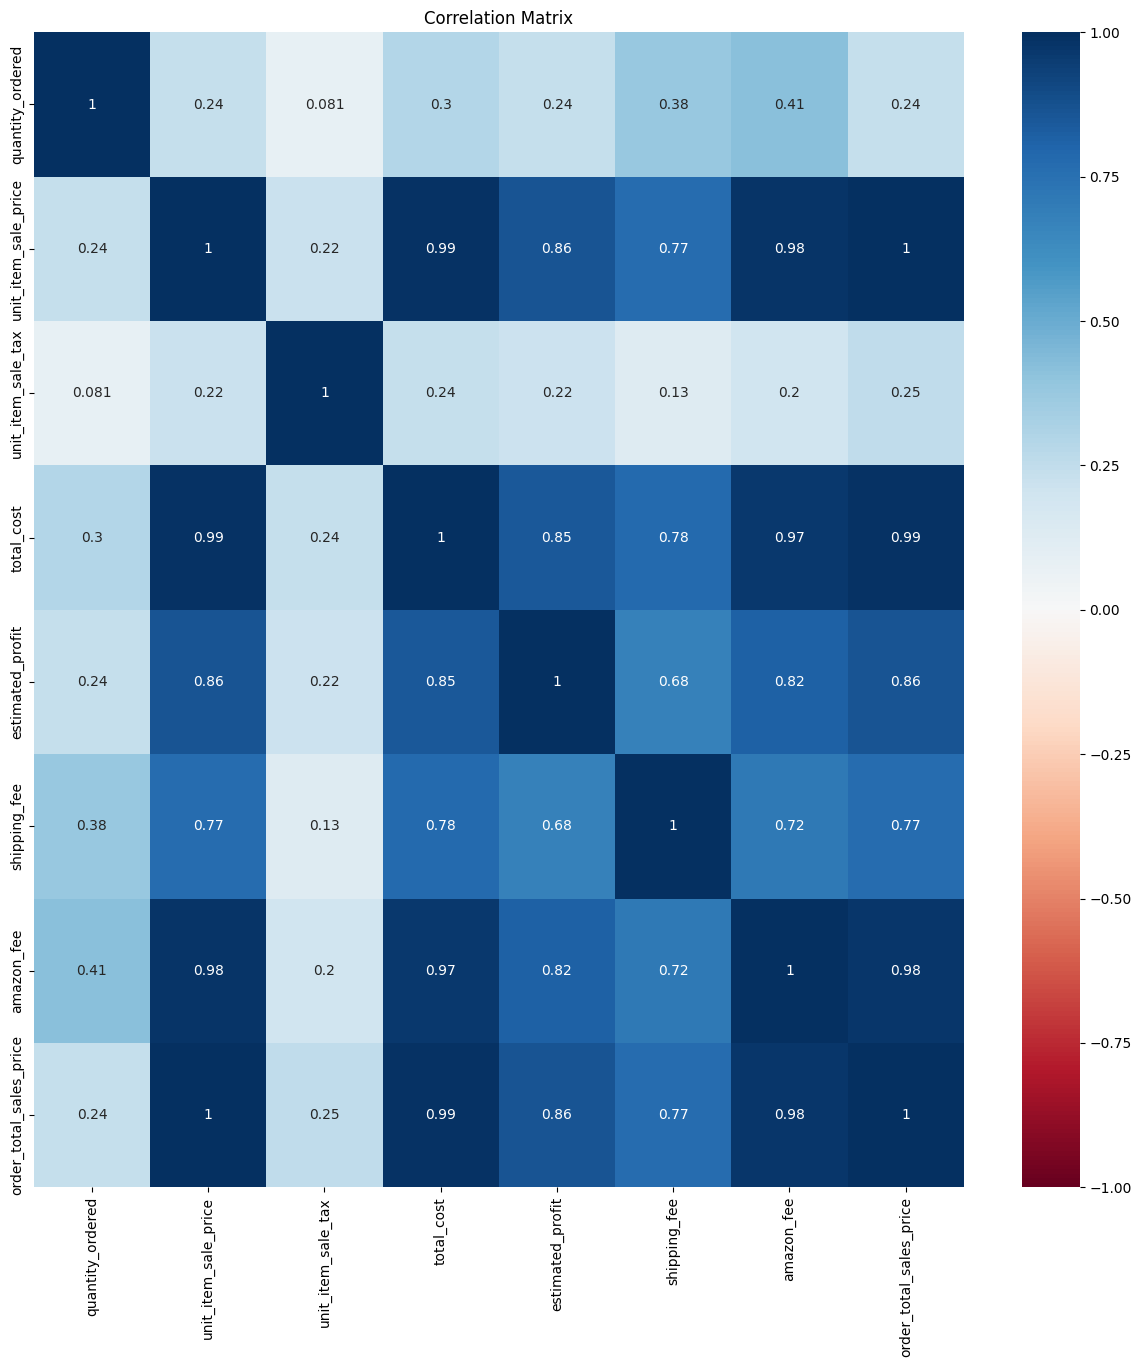

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(merged_df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<span class="burk">* Estimated_profit ve unit_item_sale_price arasında 0.86 oranla bir correlation var boş olan sütunlarımı unit_item_sale_price sütununu baz alarak doldurabilirim</span> 

In [9]:
merged_df[merged_df.duplicated()]

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price
1423,701-0408349-7159422,B08PNH5RJF,1,442.29,0.00,oneamz,352.32,54.58,29.33,35.38,AS3U5NKZ6KPGM,2023-10-11,Canada,NT,yellowknife,X1A3Z1,884.57
20778,701-2196921-2816209,B07PV2MNGM,1,11.69,1.75,NaN,NaN,NaN,NaN,NaN,A1XQN737BNKLJ,2023-06-05,Canada,NaN,NaN,NaN,26.88
49516,701-7232774-5281004,B074NB5TNW,1,30.07,3.91,NaN,NaN,NaN,NaN,NaN,A3GTU6K4B3HA0W,2023-02-07,Canada,NaN,NaN,NaN,67.97
94770,702-8224495-7590649,B000BQLQYM,1,19.12,0.96,NaN,NaN,NaN,NaN,NaN,A3JIINLK1XGCX6,2022-07-12,Canada,NaN,NaN,NaN,40.15
137358,701-0459172-6465853,B096DG4B1L,1,21.50,0.00,amazon,NaN,NaN,NaN,NaN,A1VPQM76B4L95W,2021-12-02,Canada,NaN,NaN,NaN,43.00
140541,702-5410986-2301830,B08R88RZR5,1,40.49,0.00,amazon,NaN,NaN,NaN,NaN,A1BJ0L697EI7QA,2021-11-24,Canada,NaN,NaN,NaN,80.99
164118,701-5361209-8811441,B087T2RR5N,1,49.88,0.00,amazon,NaN,NaN,NaN,NaN,A4Y8M6MBNGVEP,2021-09-12,Canada,NaN,NaN,NaN,99.75
189061,701-9251190-9461037,B00XURVCI4,1,38.95,0.00,amazon,NaN,NaN,NaN,NaN,A2GL9054BSBDEB,2021-04-30,Canada,NaN,NaN,NaN,77.90
205910,701-5715849-6472243,B07S7PNJ58,1,38.51,0.00,NaN,NaN,NaN,NaN,NaN,A33UTJS724W2TL,2020-11-05,Canada,NaN,NaN,NaN,77.01
206440,701-5095101-2090606,B07FTWKJZY,1,115.27,0.00,NaN,NaN,NaN,NaN,NaN,A14HCSESIGVYWM,2020-10-31,Canada,NaN,NaN,NaN,230.54


In [10]:
merged_df[merged_df.amazon_order_id == '701-2196921-2816209']

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price
20777,701-2196921-2816209,B07PV2MNGM,1,11.69,1.75,NaN,NaN,NaN,NaN,NaN,A1XQN737BNKLJ,2023-06-05,Canada,NaN,NaN,NaN,26.88
20778,701-2196921-2816209,B07PV2MNGM,1,11.69,1.75,NaN,NaN,NaN,NaN,NaN,A1XQN737BNKLJ,2023-06-05,Canada,NaN,NaN,NaN,26.88


In [11]:
merged_df.drop_duplicates(inplace = True) # 16 Duplicated değerler silindi

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230914 entries, 0 to 230929
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amazon_order_id          230914 non-null  object 
 1   asin                     230914 non-null  object 
 2   quantity_ordered         230914 non-null  int64  
 3   unit_item_sale_price     230906 non-null  float64
 4   unit_item_sale_tax       230906 non-null  float64
 5   shipping_company         175387 non-null  object 
 6   total_cost               111020 non-null  float64
 7   estimated_profit         114684 non-null  float64
 8   shipping_fee             79033 non-null   float64
 9   amazon_fee               10821 non-null   float64
 10  seller_id                230914 non-null  object 
 11  purchase_date            230914 non-null  object 
 12  country                  230914 non-null  object 
 13  state                    7727 non-null    object 
 14  city

In [13]:
merged_df['purchase_date'] = pd.to_datetime(merged_df['purchase_date'])  #object olan date sütunu datetime64 yapıldı

In [14]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_ordered,230914.0,1.098530,0.624902,0.00,1.00,1.00,1.00,99.00
unit_item_sale_price,230906.0,107.019354,172.390907,0.01,33.01,53.32,107.91,6700.50
unit_item_sale_tax,230906.0,0.862597,6.054769,0.00,0.00,0.00,0.00,723.53
total_cost,111020.0,100.787797,140.223257,0.01,29.65,54.63,112.43,4212.88
estimated_profit,114684.0,18.733041,34.826614,-376.00,4.16,8.75,19.65,2271.05
shipping_fee,79033.0,32.634837,38.769765,0.00,10.27,26.65,37.48,1283.05
amazon_fee,10821.0,32.679944,35.630161,0.11,13.90,23.13,39.32,659.76
order_total_sales_price,230914.0,109.493805,175.418282,0.01,33.82,55.18,110.95,7129.73


# Null values and Percentage

In [15]:
pd.set_option('display.max_rows', None)

null_values_df = pd.DataFrame({
    'Count': merged_df.isnull().sum(),
    'Percentage': (merged_df.isnull().sum() / len(merged_df) * 100).round(2)
})

with pd.option_context('display.colheader_justify', 'center'):
    print(null_values_df)

                          Count  Percentage
amazon_order_id               0      0.00  
asin                          0      0.00  
quantity_ordered              0      0.00  
unit_item_sale_price          8      0.00  
unit_item_sale_tax            8      0.00  
shipping_company          55527     24.05  
total_cost               119894     51.92  
estimated_profit         116230     50.33  
shipping_fee             151881     65.77  
amazon_fee               220093     95.31  
seller_id                     0      0.00  
purchase_date                 0      0.00  
country                       0      0.00  
state                    223187     96.65  
city                     223179     96.65  
postal_code              223179     96.65  
order_total_sales_price       0      0.00  


# unique values

In [16]:
unique_values_df = pd.DataFrame(columns=['Column Name', 'Number of Unique Values'])

for column in merged_df.columns:
    unique_values_count = merged_df[column].nunique()
    unique_values_df = unique_values_df.append({'Column Name': column, 'Number of Unique Values': unique_values_count}, ignore_index=True)

# Sort the DataFrame by the number of unique values in descending order
unique_values_df = unique_values_df.sort_values(by='Number of Unique Values', ascending=False)

print(unique_values_df.to_string(index=False, col_space=30))# unique values

                   Column Name        Number of Unique Values
               amazon_order_id                         230481
                          asin                         142353
       order_total_sales_price                          38581
          unit_item_sale_price                          37922
                    total_cost                          24962
              estimated_profit                          10909
                   postal_code                           6092
                  shipping_fee                           5331
                    amazon_fee                           5028
                     seller_id                           4439
            unit_item_sale_tax                           3225
                 purchase_date                           2065
                          city                           1957
                         state                            176
              quantity_ordered                             30
        

# Info

In [17]:
import pandas as pd

def SuperInfo(df, dropna=False):
    dt = pd.DataFrame(df.dtypes, columns=["Type"])
    dn = pd.DataFrame(df.nunique(), columns=["Nunique"])
    nonnull = pd.DataFrame(df.isnull().sum(), columns=["#of Missing"])
    firstT = df.head(1).T.rename(columns={0: "First"})

    most_freq_items = []
    most_freq_counts = []

    for x in df.columns:
        if dropna and df[x].isnull().any():
            most_freq_items.append(None)
            most_freq_counts.append(None)
        else:
            most_freq_item = df[x].value_counts().head(1).index[0] if len(df[x].value_counts()) > 0 else None
            most_freq_count = df[x].value_counts().head(1).values[0] if len(df[x].value_counts()) > 0 else None
            most_freq_items.append(most_freq_item)
            most_freq_counts.append(most_freq_count)

    MostFreqI = pd.DataFrame(most_freq_items, columns=["MostFreqItem"], index=df.columns)
    MostFreqC = pd.DataFrame(most_freq_counts, columns=["MostFreqCount"], index=df.columns)

    return pd.concat([dt, dn, nonnull, MostFreqI, MostFreqC, firstT], axis=1)

In [18]:
SuperInfo(merged_df, dropna=False)

,Type,Nunique,#of Missing,MostFreqItem,MostFreqCount,First
amazon_order_id,object,230481,0,702-3859791-5347466,7,701-4488954-7529810
asin,object,142353,0,B07LBCY6M7,233,B07JKD1G9D
quantity_ordered,int64,30,0,1,216689,1
unit_item_sale_price,float64,37922,8,0.74,663,214.18
unit_item_sale_tax,float64,3225,8,0.0,207339,0.0
shipping_company,object,2,55527,amazon,122467,oneamz
total_cost,float64,24962,119894,83.29,187,151.89
estimated_profit,float64,10909,116230,2.0,130,36.58
shipping_fee,float64,5331,151881,31.04,1777,51.67
amazon_fee,float64,5028,220093,0.29,198,25.7


# Missing values with Missingno

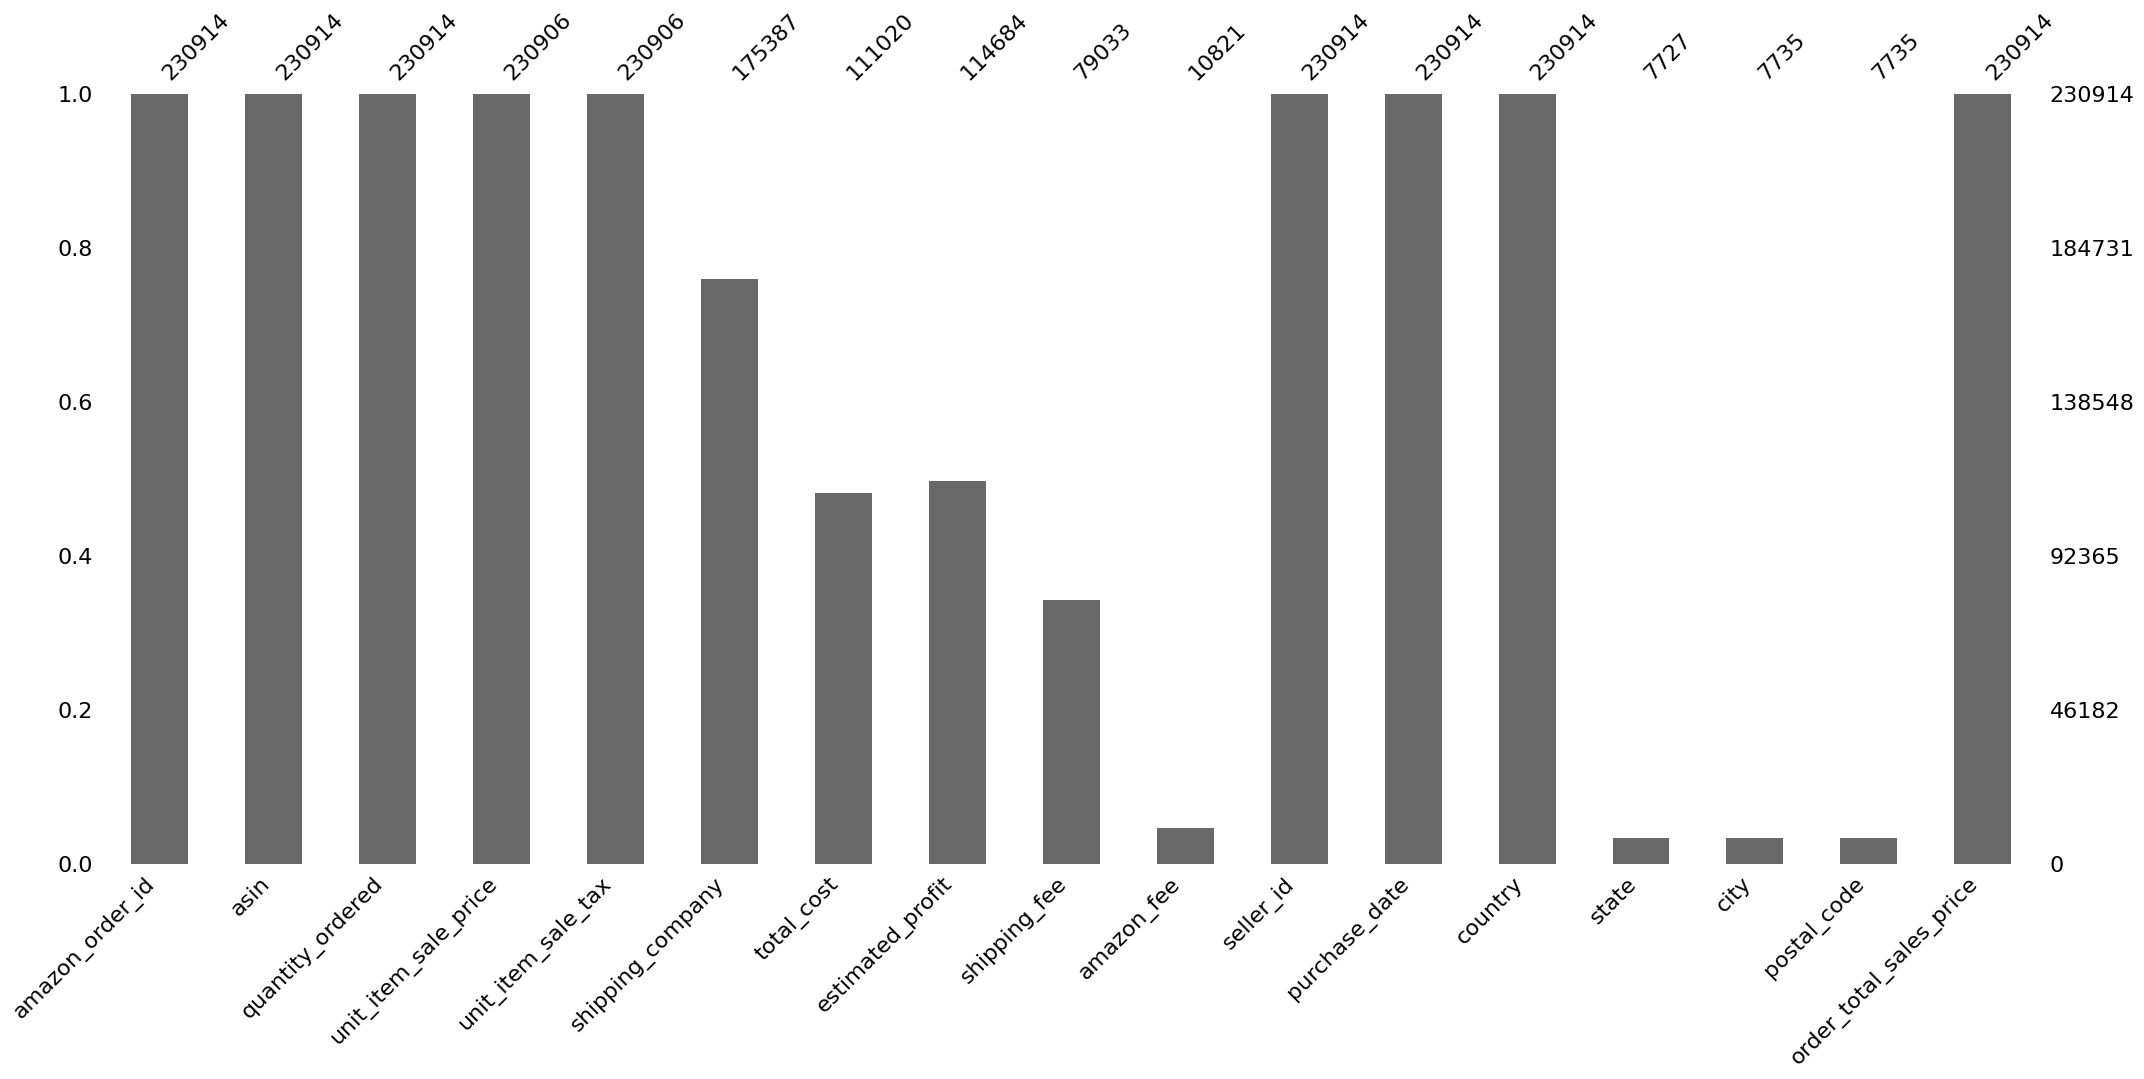

In [19]:
import missingno as msno
msno.bar(merged_df); 

In [48]:
seller = merged_df.groupby("seller_id")[["quantity_ordered"]].sum()
top10seller = seller.sort_values(by = "quantity_ordered", ascending = False)[:10]

<Figure size 800x600 with 0 Axes>

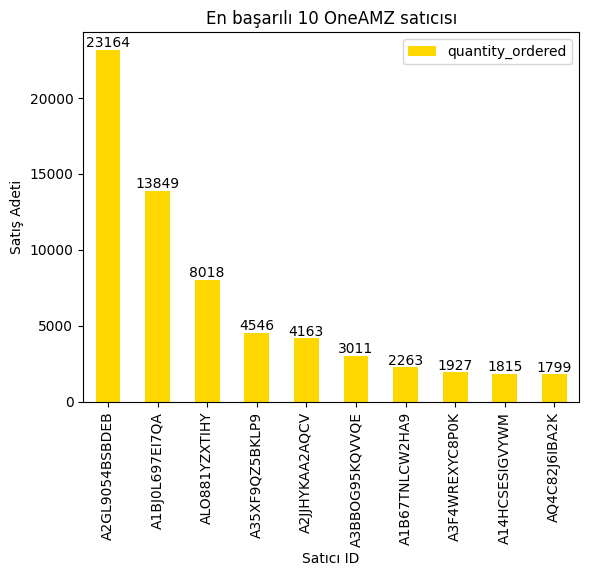

In [51]:
plt.figure(figsize=(8, 6))
bars = top10seller.plot(kind='bar', color='gold')
plt.xlabel('Satıcı ID')
plt.ylabel('Satış Adeti')
plt.title('En başarılı 10 OneAMZ satıcısı')
plt.xticks(rotation=90) 
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [21]:
merged_df.shipping_company.value_counts()

amazon    122467
oneamz     52920
Name: shipping_company, dtype: int64

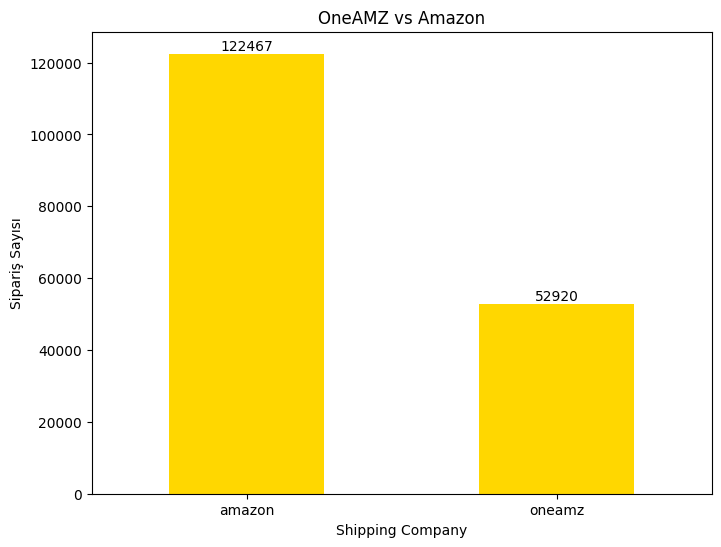

In [22]:
order_counts = merged_df.groupby('shipping_company')['amazon_order_id'].count()

plt.figure(figsize=(8, 6))
bars = order_counts.plot(kind='bar', color='gold')
plt.xlabel('Shipping Company')
plt.ylabel('Sipariş Sayısı')
plt.title('OneAMZ vs Amazon')
plt.xticks(rotation=0) 
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

<span class="mark">* oneamz satıcılarının büyük bir kısmı FBA kullanmış anlamına geliyor</span>

In [23]:
df_last_one = merged_df[merged_df['purchase_date'] > pd.to_datetime('2022-10-17')]

In [24]:
df_last_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79485 entries, 0 to 79487
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   amazon_order_id          79485 non-null  object        
 1   asin                     79485 non-null  object        
 2   quantity_ordered         79485 non-null  int64         
 3   unit_item_sale_price     79484 non-null  float64       
 4   unit_item_sale_tax       79484 non-null  float64       
 5   shipping_company         74272 non-null  object        
 6   total_cost               73835 non-null  float64       
 7   estimated_profit         73780 non-null  float64       
 8   shipping_fee             73922 non-null  float64       
 9   amazon_fee               10810 non-null  float64       
 10  seller_id                79485 non-null  object        
 11  purchase_date            79485 non-null  datetime64[ns]
 12  country                  79485 n

In [25]:
df_last_one.shipping_company.value_counts()

amazon    37989
oneamz    36283
Name: shipping_company, dtype: int64

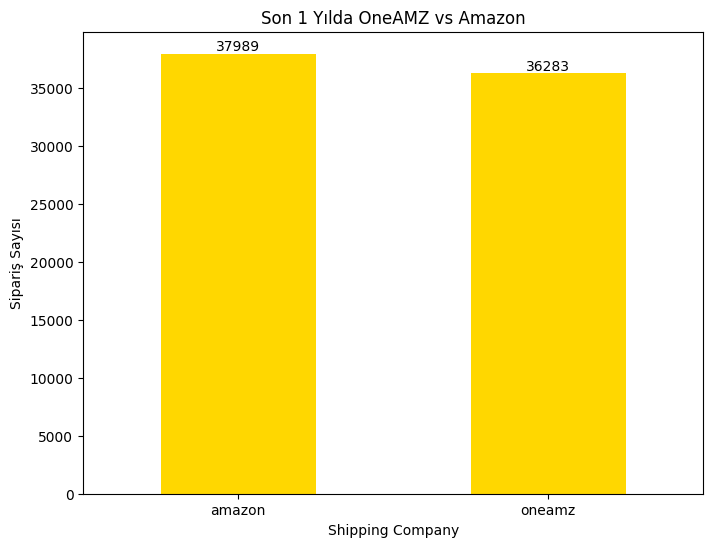

In [26]:
order_counts = df_last_one.groupby('shipping_company')['amazon_order_id'].count()

plt.figure(figsize=(8, 6))
bars = order_counts.plot(kind='bar', color='gold')
plt.xlabel('Shipping Company')
plt.ylabel('Sipariş Sayısı')
plt.title('Son 1 Yılda OneAMZ vs Amazon')
plt.xticks(rotation=0) 
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

<span class="burk">* Evet şu çıkarımda bulunabiliriz son 1 yılda satıcıların oneamz'nin servislerini kullanma oranı artmış</span>

<span class="burk">* Data analiz kısmında çizgi grafiklerle oneamz ve amazon servisleri zamana bağlı olarak görselleştirilebilir</span>

<span class="birk">* peki son ay?</span>

In [27]:
df_last_30days = merged_df[merged_df['purchase_date'] > pd.to_datetime('2023-9-17')]

In [28]:
df_last_30days.shipping_company.value_counts()

oneamz    5400
amazon       6
Name: shipping_company, dtype: int64

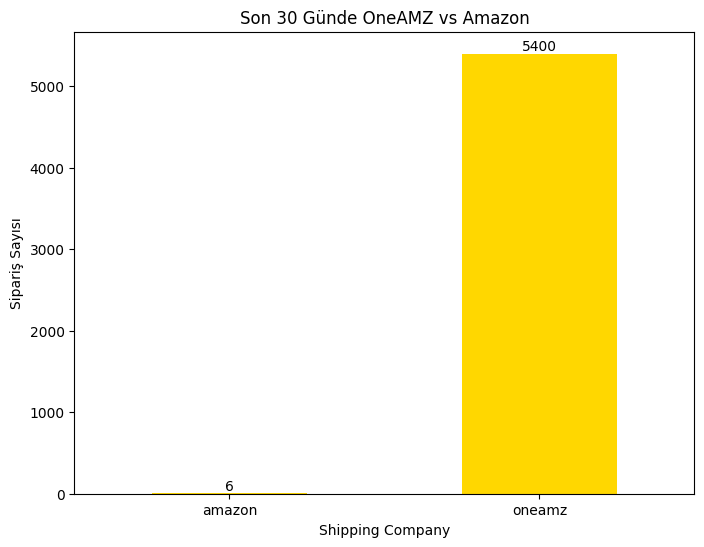

In [54]:
order_counts = df_last_30days.groupby('shipping_company')['amazon_order_id'].count()

plt.figure(figsize=(8, 6))
bars = order_counts.plot(kind='bar', color='gold')
plt.xlabel('Shipping Company')
plt.ylabel('Sipariş Sayısı')
plt.title('Son 30 Günde OneAMZ vs Amazon')
plt.xticks(rotation=0) 
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [30]:
merged_df.country.value_counts()

Canada    177530
Mexico     53382
USA            2
Name: country, dtype: int64

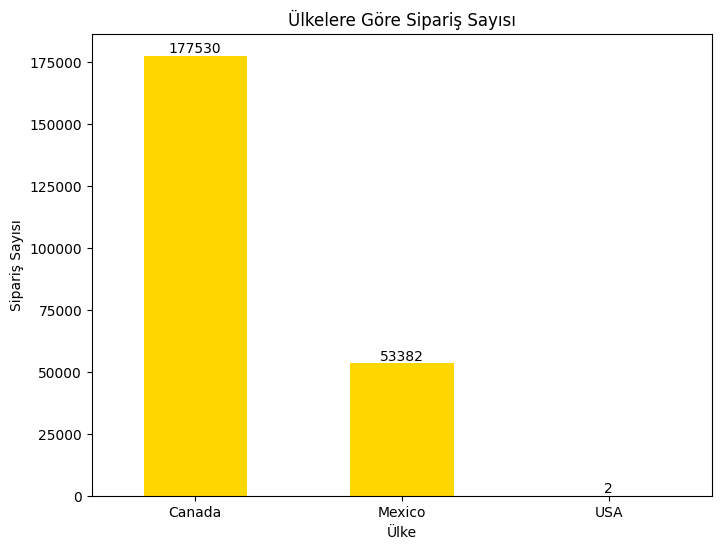

In [31]:
order_counts = merged_df.groupby('country')['amazon_order_id'].count()

plt.figure(figsize=(8, 6))
bars = order_counts.plot(kind='bar', color='gold')
plt.xlabel('Ülke')
plt.ylabel('Sipariş Sayısı')
plt.title('Ülkelere Göre Sipariş Sayısı')
plt.xticks(rotation=0) 
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [32]:
df_last_one.country.value_counts() #Son 1 yılda satışlar

Canada    48602
Mexico    30883
Name: country, dtype: int64

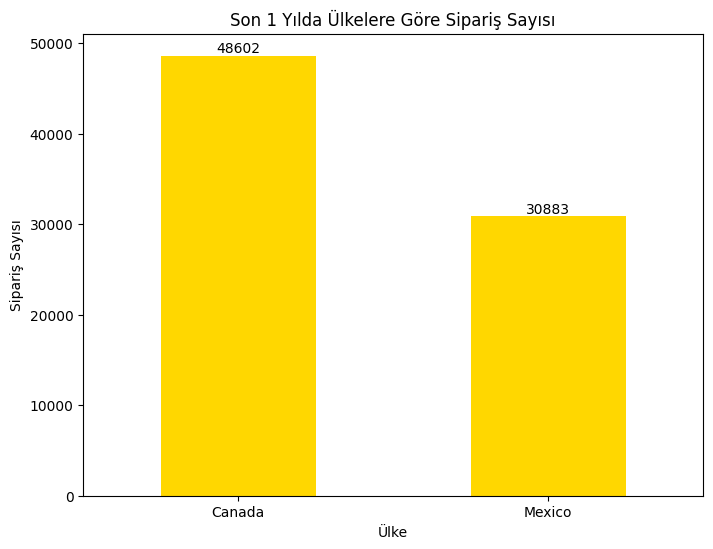

In [33]:
order_counts = df_last_one.groupby('country')['amazon_order_id'].count()

plt.figure(figsize=(8, 6))
bars = order_counts.plot(kind='bar', color='gold')
plt.xlabel('Ülke')
plt.ylabel('Sipariş Sayısı')
plt.title('Son 1 Yılda Ülkelere Göre Sipariş Sayısı')
plt.xticks(rotation=0) 
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [34]:
df_last_30days.country.value_counts() #Son 30 günde satışlar

Canada    3701
Mexico    2255
Name: country, dtype: int64

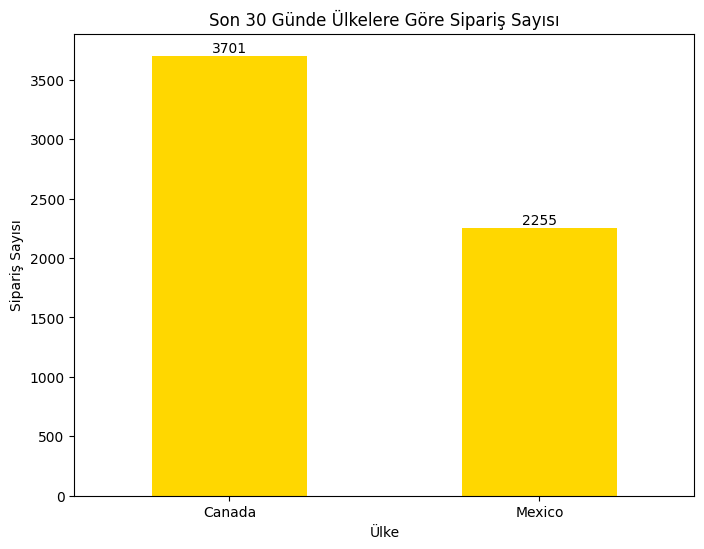

In [35]:
order_counts = df_last_30days.groupby('country')['amazon_order_id'].count()

plt.figure(figsize=(8, 6))
bars = order_counts.plot(kind='bar', color='gold')
plt.xlabel('Ülke')
plt.ylabel('Sipariş Sayısı')
plt.title('Son 30 Günde Ülkelere Göre Sipariş Sayısı')
plt.xticks(rotation=0) 
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()